# Regression Example of Dropout Layers

### Importing Library 

In [50]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [51]:
#pip install tensorflow

# Generate Data

In [52]:
X_train = np.linspace(-1, 1, 20)

In [53]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [54]:
X_test = np.linspace(-1, 1, 20)

In [55]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

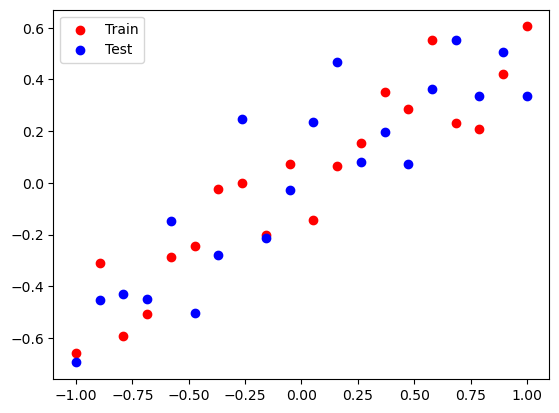

In [56]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

# Regression Model

### Model Creation

In [57]:
model_1 = Sequential()    # Define a Sequential model

# Input layer:
# - Dense layer with 128 neurons.
# - 'input_dim=1' indicates that the input data has one feature.
# - 'activation="relu"' applies the ReLU activation function to introduce non-linearity.
model_1.add(Dense(128, input_dim=1, activation="relu"))

# Hidden layer:
# - Dense layer with 128 neurons.
# - 'activation="relu"' applies the ReLU activation function to introduce non-linearity.
# - This layer helps the model to learn complex patterns from the input data.
model_1.add(Dense(128, activation="relu"))

# Output layer:
# - Dense layer with 1 neuron.
# - 'activation="linear"' applies a linear activation function.
# - This layer outputs the final prediction, suitable for regression tasks where the output is a continuous value.
model_1.add(Dense(1, activation="linear"))

# Print the model summary to view the architecture and parameters
# model_1.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Model Complication

In [58]:
# Initialize the Adam optimizer with a specified learning rate
# - 'learning_rate=0.01' sets the step size for each iteration during training.
adam = Adam(learning_rate=0.01)

# Compile the model
# - 'loss='mse'' specifies that Mean Squared Error (MSE) will be used as the loss function.
#   MSE is commonly used for regression tasks to measure the average squared difference between predicted and actual values.
# - 'optimizer=adam' sets the optimizer to the Adam optimizer, which adapts the learning rate and helps in efficient convergence.
# - 'metrics=['mse']' specifies that Mean Squared Error will also be tracked as a performance metric during training and evaluation.
model_1.compile(loss='mse', optimizer=adam, metrics=['mse'])

### Model Training 

In [59]:
# Train the model
# - 'X_train': The training input data.
# - 'y_train': The target values corresponding to the training data.
# - 'epochs=500': Specifies the number of times the entire dataset is passed through the model during training.
# - 'validation_data=(X_test, y_test)': Provides validation data to evaluate the model's performance on unseen data after each epoch.
#   This helps to monitor overfitting and ensure that the model generalizes well to new data.
# - 'verbose=False': Suppresses the progress output during training. Set to '1' or '2' to see more detailed training progress information.
history = model_1.fit(X_train, y_train, epochs=500, 
                      validation_data=(X_test, y_test),
                      verbose=False)


### Evaluate the model

In [62]:
_, train_mse = model_1.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_1.evaluate(X_test, y_test, verbose=0)
print('Error on Training : {}, Error on Testing: {}'.format(train_mse, test_mse))

Error on Training : 0.004030259326100349, Error on Testing: 0.04500780254602432


### Loss & Accuracy of model

In [63]:
# Evaluate the model on the test data
loss, accuracy = model_1.evaluate(X_test, y_test, verbose=0)

# Print the loss and accuracy
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy*100}")


Loss: 0.04500780254602432
Accuracy: 4.500780254602432


In [13]:
y_pred_1 = model_1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


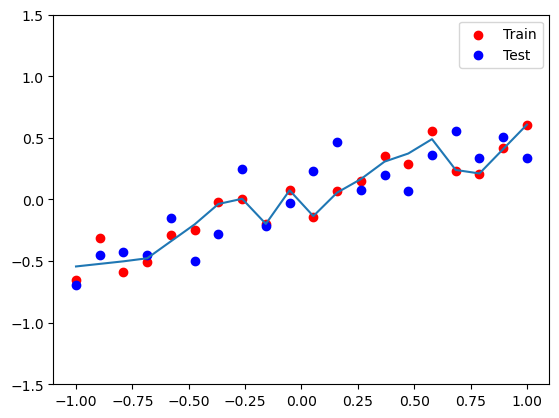

In [14]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

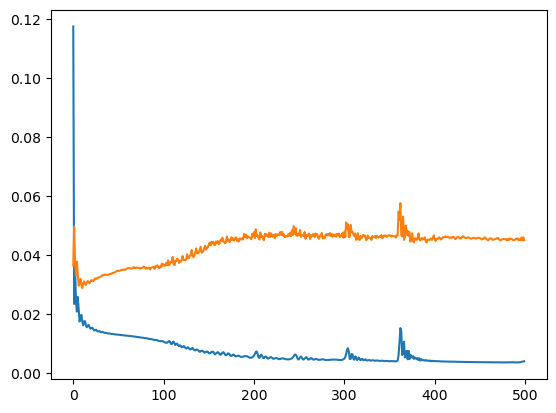

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Dropout Model

In [65]:
# Define the model with dropout layers
model_2 = Sequential()

# Input layer:
# - Dense layer with 128 neurons.
# - 'input_dim=1' indicates that the input data has one feature.
# - 'activation="relu"' applies the ReLU activation function.
model_2.add(Dense(128, input_dim=1, activation="relu"))

# Dropout layer:
# - Dropout layer with a rate of 0.2 (20%).
# - Helps to prevent overfitting by randomly setting 20% of the neurons to zero during each training epoch.
model_2.add(Dropout(0.5))

# Hidden layer:
# - Dense layer with 128 neurons.
# - 'activation="relu"' applies the ReLU activation function.
model_2.add(Dense(128, activation="relu"))

# Dropout layer:
# - Dropout layer with a rate of 0.2 (20%).
# - Helps to further prevent overfitting by randomly setting 20% of the neurons to zero during each training epoch.
model_2.add(Dropout(0.5))

# Output layer:
# - Dense layer with 1 neuron.
# - 'activation="linear"' applies a linear activation function.
# - This layer outputs the final prediction for regression tasks.
model_2.add(Dense(1, activation="linear"))

### Model Complication

In [66]:
# Initialize the Adam optimizer with a specified learning rate
# - 'learning_rate=0.01' sets the step size for each iteration during training.
adam = Adam(learning_rate=0.01)

# Compile the model
# - 'loss='mse'' specifies Mean Squared Error as the loss function for regression tasks.
# - 'optimizer=adam' sets the optimizer to Adam, which adapts the learning rate for efficient training.
# - 'metrics=['mse']' specifies that Mean Squared Error will be tracked as a performance metric.
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

### Model Tarining 

In [67]:
# Train the model
# - 'X_train': The training input data.
# - 'y_train': The target values for the training data.
# - 'epochs=500': The number of times the entire dataset is passed through the model during training.
# - 'validation_data=(X_test, y_test)': Provides validation data to evaluate the model's performance on unseen data.
# - 'verbose=False': Suppresses the progress output during training.
drop_out_history = model_2.fit(X_train, y_train, epochs=500, 
                               validation_data=(X_test, y_test),
                               verbose=False)

In [74]:
# evaluate the model
_, drop_train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, drop_test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(drop_train_mse, drop_test_mse))

Train: 0.014764562249183655, Test: 0.039006877690553665


### Comparsion of Test & Train loss with or without Using Dropout

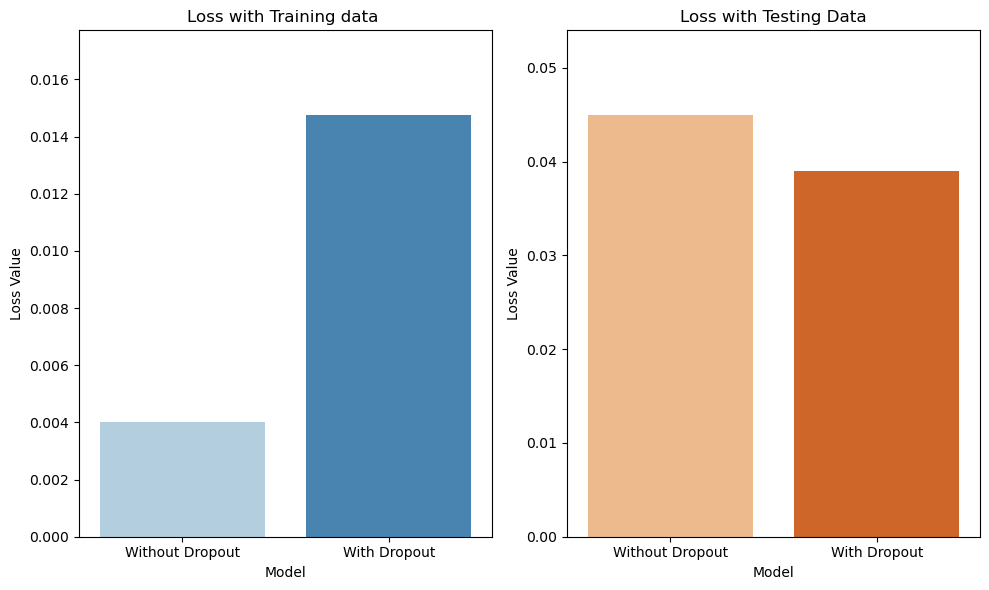

In [86]:

# Create DataFrames for Loss and Accuracy
data_loss = {
    'Model': ['Without Dropout', 'With Dropout'],
    'Loss': [train_mse, drop_train_mse]
}

data_accuracy = {
    'Model': ['Without Dropout', 'With Dropout'],
    'Accuracy': [test_mse, drop_test_mse]
}

df_loss = pd.DataFrame(data_loss)
df_accuracy = pd.DataFrame(data_accuracy)

# Plot Loss
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.barplot(x='Model', y='Loss', data=df_loss, palette='Blues')
plt.title('Loss with Training data ')
plt.ylabel('Loss Value')
plt.ylim(0, max(train_mse, drop_train_mse) * 1.2)  # Adjusting the y-axis limit for better visualization

# Plot Accuracy
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.barplot(x='Model', y='Accuracy', data=df_accuracy, palette='Oranges')
plt.title('Loss with Testing Data')
plt.ylabel('Loss Value')
plt.ylim(0, max(test_mse, drop_test_mse) * 1.2)  # Adjusting the y-axis limit for better visualization

# Adjust layout
plt.tight_layout()
plt.show()


In [79]:
# Evaluate the model on the test data
drop_loss, drop_accuracy = model_2.evaluate(X_test, y_test, verbose=0)

# Print the loss and accuracy
print(f"Loss: {drop_loss}")
print(f"Accuracy: {drop_accuracy*100}")


Loss: 0.039006877690553665
Accuracy: 3.9006877690553665


In [45]:
y_pred_2 = model_2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


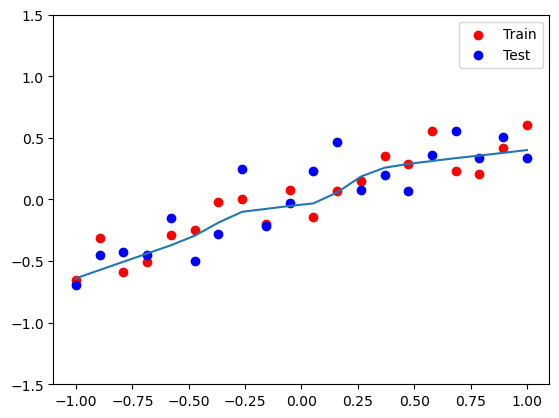

In [46]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()